# Setup

- ADS: Carla garage (TP++)
- Repetitions: 1
- 132 sliced scenarios

# Loading data in one DF

In [198]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pathlib import Path

pd.set_option('display.max_rows', 30)

In [199]:
def process_df(df):
    record_df = pd.json_normalize(df['records'])
    # concatenate records data
    df = pd.concat([df, record_df],  axis=1)

    # drop original column
    df = df.drop('records', axis=1)

    # drop infractions columns

    # remove prefixes from column name
    df.columns = df.columns.str.removeprefix('meta.')
    df.columns = df.columns.str.removeprefix('scores.')
    # df = df.rename(columns={"index": "route_index"})
    df = df.set_index(['fps', 'highquality', 'index'])
    return df

In [200]:
def make_df(path: str):
    with open(path, "r") as f:
        path = path.strip("data/.json")
        print(path)
        it = iter(path.split("_"))
        data = dict(zip(it, it))

        content = json.load(f)
        data['records'] = content['_checkpoint']['records']

        df = pd.DataFrame(data)
        return process_df(df)

In [201]:


dfs = []
path = "data/*.json"
for file_path in glob.glob(path):
    dfs.append(make_df(file_path))

df_combined = pd.concat(dfs)

df_combined.info()

fps_20_highquality_True
fps_20_highquality_False
fps_10_highquality_False
fps_30_highquality_True
fps_18_highquality_True
fps_12_highquality_True
fps_14_highquality_True
fps_10_highquality_True
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1056 entries, ('20', 'True', 0) to ('10', 'True', 131)
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   route_id                           1056 non-null   object 
 1   status                             1056 non-null   object 
 2   infractions.collisions_layout      1056 non-null   object 
 3   infractions.collisions_pedestrian  1056 non-null   object 
 4   infractions.collisions_vehicle     1056 non-null   object 
 5   infractions.outside_route_lanes    1056 non-null   object 
 6   infractions.red_light              1056 non-null   object 
 7   infractions.route_dev              1056 non-null   object 
 8   infractions.route_timeo

# Research questions


- RQ1: How does lowering the simulation's fidelity affect its execution time?
  - RQ1a: FPS impact on execution time
  - RQ1b: Rendering quality impact on execution time
- RQ2: How does lowering the simulation's fidelity affect evaluation results?
  - RQ2a: FPS impact on evaluation results
  - RQ2b: Rendering quality impact on evaluation results
- RQ3: How does lowering the simulation's fidelity affect using existing ADS testing techniques?


# Answering RQ1a & RQ2a

In [202]:
# take all rows where we were using high quality
df = df_combined.xs("True", level='highquality')
df = df.reset_index()

In [203]:
def plot(column):
    axes = df.groupby('fps')[column].mean().plot()
    axes.set_title(column)

    size = 6
    fig, ax = plt.subplots(figsize=(size, size))

    axes = df.boxplot(column=column,
                      by=['fps'], ax=ax)

    axes.set_title(column)

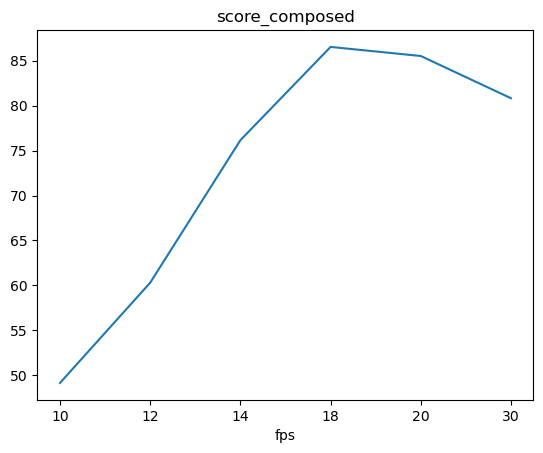

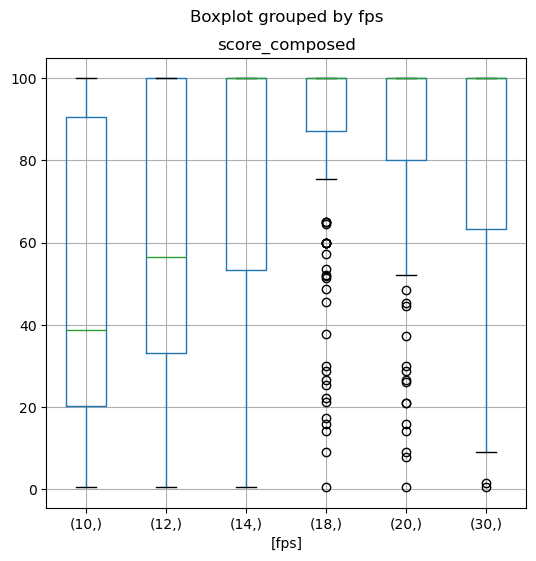

In [204]:
plot("score_composed")

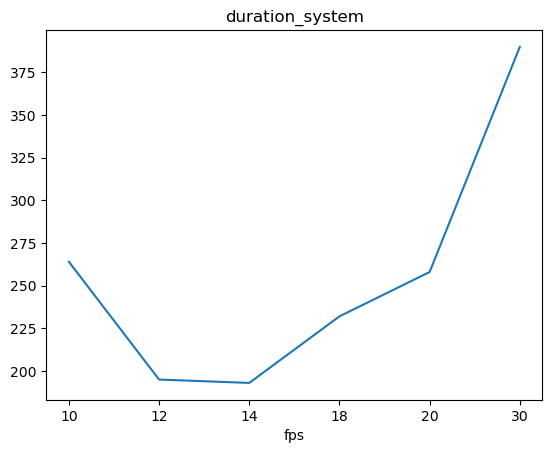

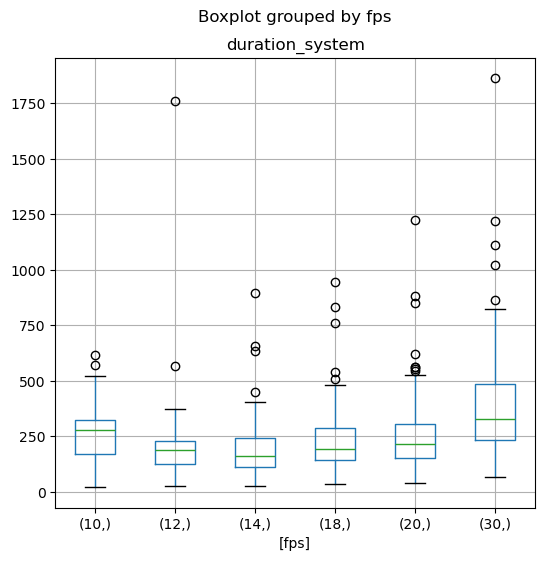

In [205]:
plot("duration_system")